# Modeling recruitment time series from 'astsa' package as an AR process

In [31]:
library(astsa)
my.data=rec

### Important step: subtract mean of X_t=𝜇 as done in slides

In [32]:
ar.process=my.data-mean(my.data)

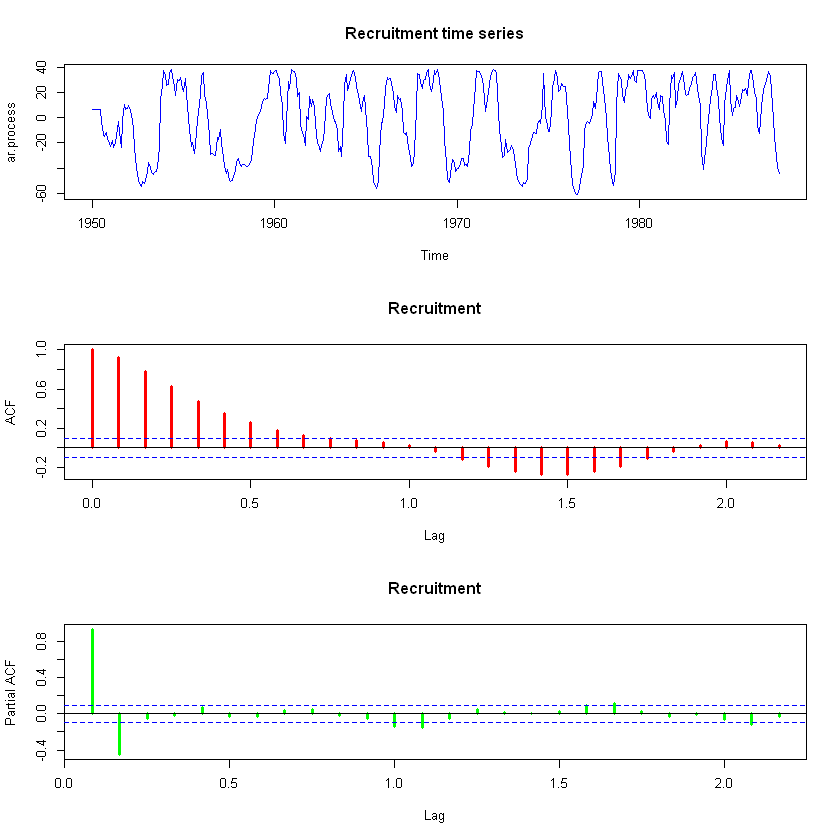

In [33]:
# ACF and PACF of the process
par(mfrow=c(3,1))
plot(ar.process, main='Recruitment time series', col='blue')
acf(ar.process, main='Recruitment', col='red', lwd=3)
pacf(ar.process, main='Recruitment', col='green', lwd=3)

clearly we must model a AR(2) as:<br>
Note here phi0 is not 0<center> X_t = phi0 + phi1\*X_(t-1) + phi2\*X_(t-2) + Z_t </center>
<center>Z_t ~ N(0, sigma^2) </center>

In [34]:
# order from PACF
p=2

# sample autocorreleation function r
r=NULL
r[1:p]=acf(ar.process, plot=F)$acf[2:(p+1)]
cat('r=',r,'\n')

r= 0.9218042 0.7829182 


In [35]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 2 by 2, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

1.0000000,0.9218042
0.9218042,1.0000000


In [36]:
# b-column vector on the right
b=NULL
b=matrix(r,p,1)# b- column vector with no entries
b

0.9218042
0.7829182


In [37]:
# solve(R,b) solves Rx=b, and gives x=R^(-1)b vector
phi.hat=NULL
phi.hat=solve(R,b)[,1]
phi.hat

[1]  1.3315874 -0.4445447

In [38]:
#variance estimation using Yule-Walker Estimator
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
c0

[1] 780.991

In [39]:
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 94.17131

In [40]:
# constant term in the model
phi0.hat=mean(my.data)*(1-sum(phi.hat))
phi0.hat

[1] 7.033036

In [41]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 7.033036  Coeffcinets: 1.331587 -0.4445447  and Variance: 94.17131 
